In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import torch

/home/qiaodan/anaconda3/envs/standard38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
s3n9 = pd.read_csv('./exp_seed3_norm9.csv', header=None)
s2n9 = pd.read_csv('./exp_seed2_norm9.csv', header=None)
s1n9 = pd.read_csv('./exp_seed1_norm9.csv', header=None)

s2n0 = pd.read_csv('./exp_seed2_norm0.csv', header=None)


In [3]:
s3n9_arr = np.array(s3n9)
s2n9_arr = np.array(s2n9)
s2n0_arr = np.array(s2n0)
s1n9_arr = np.array(s1n9)

s2n9.shape, s1n9.shape, s2n0.shape

((10, 20000), (10, 20000), (10, 20000))

In [4]:
def smooth(tmp, l):
#     assert l >= 1
#     if l == 1:
#         return tmp
    result = tmp.copy()
    for i in range(20000):
        result[..., i] = tmp[..., max(0, i-l+1):i+1].mean(axis=-1)

    return result


In [5]:
x_list = list(range(20000))
len(x_list)

20000

In [7]:
def smooth(tmp, l):
#     assert l >= 1
#     if l == 1:
#         return tmp
    result = tmp.copy()
    for i in range(20000):
        result[..., i] = tmp[..., max(0, i-l+1):i+1].mean(axis=-1)

    return result



In [8]:
smooth_s3n9 = np.zeros((10, 20000))
smooth_s2n9 = np.zeros((10, 20000))
smooth_s2n0 = np.zeros((10, 20000))
smooth_s1n9 = np.zeros((10, 20000))
for i in range(10):
    smooth_s3n9[i,:] = smooth(s3n9_arr[i,:], 500)
    smooth_s2n9[i,:] = smooth(s2n9_arr[i,:], 500)
    smooth_s2n0[i,:] = smooth(s2n0_arr[i,:], 500)
    smooth_s1n9[i,:] = smooth(s1n9_arr[i,:], 500)

    
smooth_s2n9.shape

(10, 20000)

In [9]:
mean_s3n9 = np.mean(smooth_s3n9, axis=0)
mean_s2n9 = np.mean(smooth_s2n9, axis=0)
mean_s2n0 = np.mean(smooth_s2n0, axis=0)
mean_s1n9 = np.mean(smooth_s1n9, axis=0)



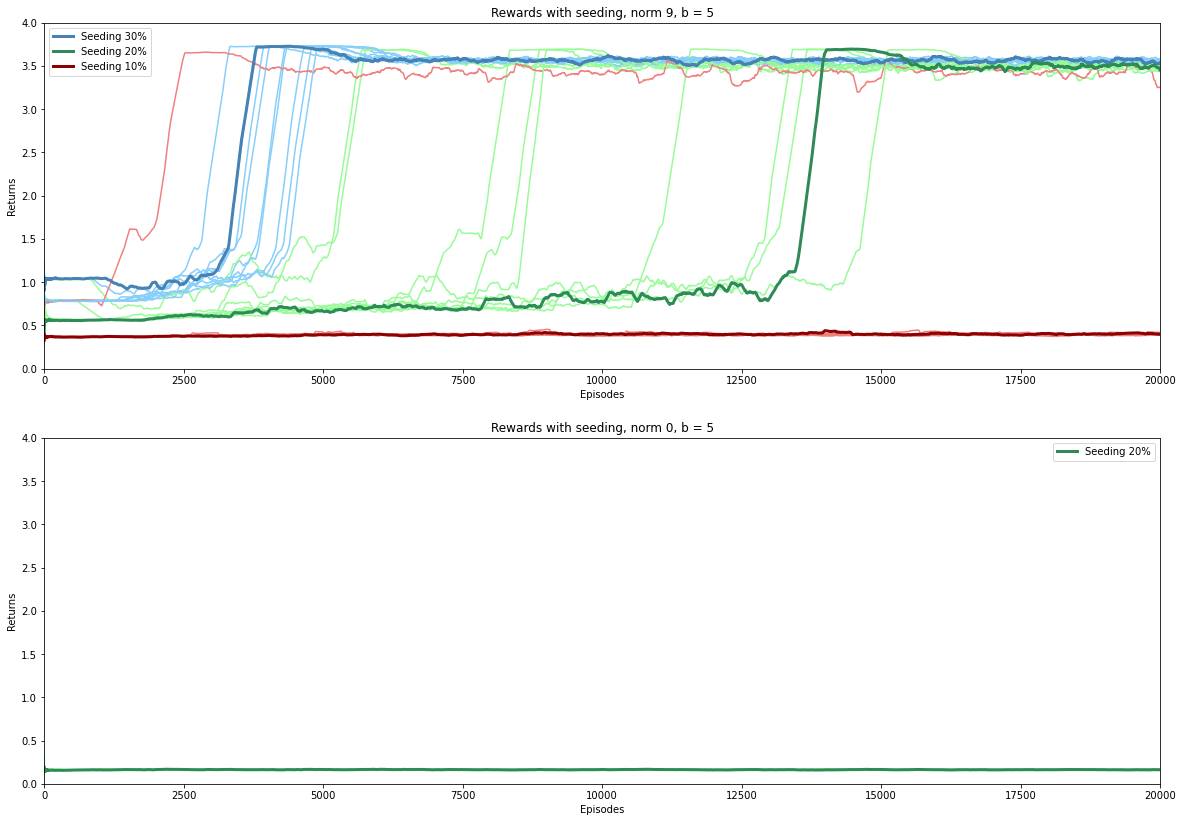

In [12]:
plt.figure(figsize=(20, 14))
plt.subplot(211)
for i in range(10):
    plt.plot(x_list, smooth_s3n9[i, :], color = 'lightskyblue')
    plt.plot(x_list, smooth_s2n9[i, :], color = 'palegreen')
    plt.plot(x_list, smooth_s1n9[i, :], color = 'lightcoral')
plt.plot(x_list, smooth_s3n9[i, :], color = 'steelblue', linewidth = 3, label='Seeding 30%')
plt.plot(x_list, smooth_s2n9[i, :], color = 'seagreen', linewidth = 3, label='Seeding 20%')
plt.plot(x_list, smooth_s1n9[i, :], color = 'darkred', linewidth = 3, label='Seeding 10%')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Rewards with seeding, norm 9, b = 5')
plt.axis([0, 20000, 0, 4])
plt.legend()

plt.subplot(212)
for i in range(10):
    plt.plot(x_list, smooth_s2n0[i, :], color = 'palegreen')
#     plt.plot(x_list, smooth_s1n9[i, :], color = 'lightcoral')
plt.plot(x_list, smooth_s2n0[i, :], color = 'seagreen', linewidth = 3, label='Seeding 20%')
# plt.plot(x_list, smooth_s1n9[i, :], color = 'darkred', linewidth = 3)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Rewards with seeding, norm 0, b = 5')
plt.axis([0, 20000, 0, 4])
plt.legend()

plt.savefig('/home/qiaodan/results/Reputation/exp_seed/seeding_agents_to_promote_cooperation.png')